# Objective

Plot and compare phase split compositions of ANN and EOS along a mixing line at constant T, P.

Now that ANN models for nC4 and nC10 have been tried to compute phase split calculations, its time to compare them.  

1) Store ANN phase split compositions of liquid and vapor  
2) Store EOS phase split compositions of liquid and vapor  
3) Plot and compare  

One phase-split had about 0.005 difference in phase comp. Let's hope for the best.  

In [1]:
from Stability_and_flash import pr as PR
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Instantiate class for ANN
pr = PR()
pr.useModel = True


At constant T, P, run for loops for z in np.linspace(0,1,100)

In [3]:
########################################################################################
# INPUTS
T = 500  # [K] [620, 650]
P = 30  # [bar] [10, 30]

# nC4-C10
z = np.array([0.65, 0.35])
w = np.array([0.193, 0.49])
Pc = np.array([37.997, 21.1])  # [bar]
Tc = np.array([425.2, 617.6])  # [K]
BIP = np.zeros([2, 2])

NRtol = 1E-12
NRmaxit = 100  # I think 10 is enough
SStol = 1E-6  #1E-10
tolSSSA = 1E-5
SSmaxit = 500  # 1000000 # 1E6 might crash my computer or take too long.
TolRR = 1E-10
TolXz = 1E-8
itSSSAmax = 1E6

# More global constants
Tr = T / Tc
Pr = P / Pc

Nc = len(z)

phase_num = 1
row_index = 0

In [4]:
#####################################################################################

# Load models
modelPath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T300-600_P5-100__100_4_20_100_20200915-230243'
]
pipelinePath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\full_pipeline_lnphi_nC4_T300-600_P5-100__100_4_20_100_.pkl',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T300-600_P5-100__100_4_20_100_20200915-230243\full_pipeline_lnphi_nC4_T300-600_P5-100__100_4_20_100_.pkl'
]
pr.load_ANN_model(modelPath, pipelinePath)


Model loading successful.


In [5]:
ANN_lcomp = []
ANN_vcomp = []
ANN_z = []
for z[0] in np.linspace(0.001, 0.999, 50):
    z[1] = 1.-z[0]

    # Parameters independent of composition placed out of loop.
    # Used in either stability analysis or 2-phase PT flash.

    # Get all K-values from Wilson
    K = pr.wilson_corr(Pr, Tr, w)
    ln_K = np.log(K)

    # Get all ai, bi values
    a_i, b_i = pr.aibi(P, T, w, Pr, Tr, Pc, Tc)

    # Get Vw mixing, part with BIPs and square roots
    Am = pr.Vw(Nc,a_i,BIP)
    ##########################################################################################
    # Debug
    pr.tmp_list = []
    pr.z_list = []
    # Stability Analysis
    # Calculate constants ln_phi(z) ln(z[i])

    sumXX_list, liq_case, vap_case = pr.stability_analysis(T, P, z, b_i, Am, tolSSSA, itSSSAmax, Nc, K, TolXz)

    print('At P = %s bar, and T = %s K' % (P, T))
    if liq_case < 0 or vap_case < 0:
        print('Run 2-phase flash.')
        phase_num = 2
        liq_comp, vap_comp = pr.two_phase_flash_iterate(Pr, Tr, w, SSmaxit, SStol, TolRR, Nc, Am, b_i, NRmaxit, z) #todo: Update Stability_and_flash
        print('liq and vap comp:')
        print(liq_comp, vap_comp)
        
        # Store phase comps for plotting
        ANN_lcomp.append(list(liq_comp))
        ANN_vcomp.append(list(vap_comp))
        ANN_z.append(list(z))
    elif liq_case > 0 and vap_case > 0:
        print('Single phase stable')
        print('P = %s bar, T = %s K' % (P, T))
        print('Liq case: %d, Vap case: %d' % (liq_case, vap_case))
        # Copy single phase composition
        
print('END')


At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer loop count: 0
Vapor frac: -0.4327382030335422
Liquid comp: [0.27942064 0.72057936]
Vapor comp: [0.92281343 0.07718657]
K old: [3.30259579 0.10711737]
K new: [1.8629133 0.2688173]
########################################
SS Flash outer loop count: 1
Vapor frac: -1.1563385474818093
Caution: Material balance problem for component 0
1.1035869557752577e-05
Caution: Material balance problem for component 1
1.1035869558195799e-05
Liquid comp: [0.45868874 0.54131126]
Vapor comp: [0.85448779 0.14551221]
K old: [1.8629133 0.2688173]
K new: [1.7383633  0.30454412]
########################################
SS Flash outer loop count: 2
Vapor frac: -1.3515546800888998
Caution: Material balance problem for component 0
5.533185080674151e-06
Caution: Material balance problem for component 1
5.533185080675018e-06
Liquid comp: [0.485034 0.514966]
Vapor comp: [0.84316937 0.15683063]
K old: [1.7383633  0.30454412]
K new: 

Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 26
Vapor frac: -1.4227856539283312
Caution: Material balance problem for component 0
1.1549512178522271e-05
Caution: Material balance problem for component 1
1.1549512178632426e-05
Liquid comp: [0.4940656 0.5059344]
Vapor comp: [0.84060693 0.15939307]
K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 27
Vapor frac: -1.4227918857006268
Caution: Material balance problem for component 0
1.98794748673594e-06
Caution: Material balance problem for component 1
1.9879474868478297e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 28
Vapor frac: -1.4227846062630314
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.1593

K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 52
Vapor frac: -1.4227846068259549
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 53
Vapor frac: -1.422784621323193
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 54
Vapor frac: -1.4227855010435517
Caution: Material balance problem for component 0
1.2862890552577631e-05
Caution: Material balance problem for component 1
1.2862890552911566e-05
Liquid comp: [0.49405086 0.50594914]
Vapor comp: [0.84059903 0.15940097]
K old: [1.701424   0.31504995]
K new: [1.7014291  0.31505105]
########################################
SS Flash outer loop count: 55
Vapo

K old: [1.701424   0.31504995]
K new: [1.7014291  0.31505105]
########################################
SS Flash outer loop count: 79
Vapor frac: -1.4227750876049645
Caution: Material balance problem for component 0
2.323455081587513e-05
Caution: Material balance problem for component 1
2.3234550816098043e-05
Liquid comp: [0.49404238 0.50595762]
Vapor comp: [0.84059442 0.15940558]
K old: [1.7014291  0.31505105]
K new: [1.7014337 0.3150525]
########################################
SS Flash outer loop count: 80
Vapor frac: -1.4227659661492558
Caution: Material balance problem for component 0
3.0131094362903857e-06
Caution: Material balance problem for component 1
3.0131094362895183e-06
Liquid comp: [0.49405606 0.50594394]
Vapor comp: [0.84060149 0.15939851]
K old: [1.7014337 0.3150525]
K new: [1.701426   0.31505033]
########################################
SS Flash outer loop count: 81
Vapor frac: -1.4227814565113286
Liquid comp: [0.4940578 0.5059422]
Vapor comp: [0.84060275 0.15939725]
K

K old: [1.7014337 0.3150525]
K new: [1.701426   0.31505033]
########################################
SS Flash outer loop count: 105
Vapor frac: -1.422781457074252
Liquid comp: [0.4940578 0.5059422]
Vapor comp: [0.84060275 0.15939725]
K old: [1.701426   0.31505033]
K new: [1.701425   0.31504995]
########################################
SS Flash outer loop count: 106
Vapor frac: -1.422783675396887
Caution: Material balance problem for component 0
1.1852713313388087e-05
Caution: Material balance problem for component 1
1.1852713313720287e-05
Liquid comp: [0.49406543 0.50593457]
Vapor comp: [0.84060692 0.15939308]
K old: [1.701425   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 107
Vapor frac: -1.4227918711606853
Caution: Material balance problem for component 0
1.98290874731024e-06
Caution: Material balance problem for component 1
1.9829087470890627e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K

K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 130
Vapor frac: -1.4227918291296993
Caution: Material balance problem for component 0
1.9683431319297492e-06
Caution: Material balance problem for component 1
1.9683431319306166e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 131
Vapor frac: -1.4227845496921039
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 132
Vapor frac: -1.422784564189342
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 133
Va

K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 156
Vapor frac: -1.4227845848185166
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 157
Vapor frac: -1.4227845993157546
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 158
Vapor frac: -1.42278564899399
Caution: Material balance problem for component 0
1.1551222131812346e-05
Caution: Material balance problem for component 1
1.1551222131700456e-05
Liquid comp: [0.4940656 0.5059344]
Vapor comp: [0.84060693 0.15939307]
K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 159
Vapor

K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 184
Vapor frac: -1.4227846155004231
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 185
Vapor frac: -1.4227846299976612
Caution: Material balance problem for component 0
1.1700598780640427e-05
Caution: Material balance problem for component 1
1.1700598780417515e-05
Liquid comp: [0.4940655 0.5059345]
Vapor comp: [0.84060692 0.15939308]
K old: [1.7014245  0.31504995]
K new: [1.7014209  0.31504884]
########################################
SS Flash outer loop count: 186
Vapor frac: -1.4227918530735923
Caution: Material balance problem for component 0
1.911525825736525e-06
Caution: Material balance problem for component 1
1.9115258257373924e-06
Liquid comp: [0.49405897 0.50594103]
Vapor comp: [0.84060361 0.15939639]
K 

Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 210
Vapor frac: -1.422785657489027
Caution: Material balance problem for component 0
1.1548278250229395e-05
Caution: Material balance problem for component 1
1.154827825033955e-05
Liquid comp: [0.4940656 0.5059344]
Vapor comp: [0.84060693 0.15939307]
K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 211
Vapor frac: -1.4227918892613225
Caution: Material balance problem for component 0
1.9891814267971805e-06
Caution: Material balance problem for component 1
1.989181426798048e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 212
Vapor frac: -1.4227846098237271
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15

K old: [1.701425   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 236
Vapor frac: -1.4227918701125402
Caution: Material balance problem for component 0
1.982545518085764e-06
Caution: Material balance problem for component 1
1.9825455181976537e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 237
Vapor frac: -1.4227845906749448
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 238
Vapor frac: -1.4227846051721829
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 239
Va

Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 263
Vapor frac: -1.4227856554133418
Caution: Material balance problem for component 0
1.1548997560618425e-05
Caution: Material balance problem for component 1
1.1548997561061647e-05
Liquid comp: [0.4940656 0.5059344]
Vapor comp: [0.84060693 0.15939307]
K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 264
Vapor frac: -1.4227918871856373
Caution: Material balance problem for component 0
1.988462109302723e-06
Caution: Material balance problem for component 1
1.9884621090815457e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 265
Vapor frac: -1.422784607748042
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.1

K old: [1.701424  0.3150496]
K new: [1.7014291  0.31505087]
########################################
SS Flash outer loop count: 288
Vapor frac: -1.4227752485799494
Caution: Material balance problem for component 0
1.3386344497657611e-05
Caution: Material balance problem for component 1
1.338634449798981e-05
Liquid comp: [0.49406454 0.50593546]
Vapor comp: [0.84060638 0.15939362]
K old: [1.7014291  0.31505087]
K new: [1.7014209  0.31504905]
########################################
SS Flash outer loop count: 289
Vapor frac: -1.4227918511588384
Caution: Material balance problem for component 0
1.8597865799599086e-06
Caution: Material balance problem for component 1
1.8597865801828206e-06
Liquid comp: [0.49405893 0.50594107]
Vapor comp: [0.8406035 0.1593965]
K old: [1.7014209  0.31504905]
K new: [1.701424  0.3150498]
########################################
SS Flash outer loop count: 290
Vapor frac: -1.4227856465998971
Caution: Material balance problem for component 0
1.1511992809799289e-0

Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 314
Vapor frac: -1.422785594815203
Caution: Material balance problem for component 0
1.1569997320993487e-05
Caution: Material balance problem for component 1
1.1569997321103642e-05
Liquid comp: [0.4940656 0.5059344]
Vapor comp: [0.84060693 0.15939307]
K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 315
Vapor frac: -1.4227919116518706
Caution: Material balance problem for component 0
1.0248559724535845e-05
Caution: Material balance problem for component 1
1.0248559724312933e-05
Liquid comp: [0.49406636 0.50593364]
Vapor comp: [0.84060763 0.15939237]
Exit flag:1
K old: [1.7014209 0.3150487]
K new: [1.70142    0.31504846]
########################################
SS Flash outer loop count: 316
Vapor frac: -1.4227937906991215
Caution: Material balance problem for component

K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 341
Vapor frac: -1.4227845822763159
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 342
Vapor frac: -1.422784596773554
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 343
Vapor frac: -1.4227856464517894
Caution: Material balance problem for component 0
1.1552103109103463e-05
Caution: Material balance problem for component 1
1.1552103109435663e-05
Liquid comp: [0.4940656 0.5059344]
Vapor comp: [0.84060693 0.15939307]
K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 344
Vapo

Exit flag:1
K old: [1.7014245 0.3150498]
K new: [1.701424  0.3150501]
########################################
SS Flash outer loop count: 367
Vapor frac: -1.4227856242649197
Caution: Material balance problem for component 0
1.159985074761314e-05
Caution: Material balance problem for component 1
1.1599850746946139e-05
Liquid comp: [0.49406556 0.50593444]
Vapor comp: [0.84060685 0.15939315]
K old: [1.701424  0.3150501]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 368
Vapor frac: -1.4227918560372153
Caution: Material balance problem for component 0
1.97766778875421e-06
Caution: Material balance problem for component 1
1.977667788977122e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 369
Vapor frac: -1.4227845765996199
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.1593968

K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 393
Vapor frac: -1.4227918861374922
Caution: Material balance problem for component 0
1.9880988798562024e-06
Caution: Material balance problem for component 1
1.9880988801901367e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 394
Vapor frac: -1.4227846066998968
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 395
Vapor frac: -1.422784621197135
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 396
Va

K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 419
Vapor frac: -1.4227846217600584
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 420
Vapor frac: -1.4227855014804172
Caution: Material balance problem for component 0
1.286304194747425e-05
Caution: Material balance problem for component 1
1.286304194803023e-05
Liquid comp: [0.49405086 0.50594914]
Vapor comp: [0.84059903 0.15940097]
K old: [1.701424   0.31504995]
K new: [1.7014291  0.31505105]
########################################
SS Flash outer loop count: 421
Vapor frac: -1.4227750874789065
Caution: Material balance problem for component 0
2.3234507130153424e-05
Caution: Material balance problem for component 1
2.3234507130376336e-05
Liquid comp: [0.49404238 0.50595762]
Vapor comp: [0.8405

K old: [1.7014291  0.31505105]
K new: [1.7014337 0.3150525]
########################################
SS Flash outer loop count: 446
Vapor frac: -1.4227659665861212
Caution: Material balance problem for component 0
3.012958042726034e-06
Caution: Material balance problem for component 1
3.0129580422810776e-06
Liquid comp: [0.49405606 0.50594394]
Vapor comp: [0.84060149 0.15939851]
K old: [1.7014337 0.3150525]
K new: [1.701426   0.31505033]
########################################
SS Flash outer loop count: 447
Vapor frac: -1.422781456948194
Liquid comp: [0.4940578 0.5059422]
Vapor comp: [0.84060275 0.15939725]
K old: [1.701426   0.31505033]
K new: [1.701425   0.31504995]
########################################
SS Flash outer loop count: 448
Vapor frac: -1.422783675270829
Caution: Material balance problem for component 0
1.1852756997777526e-05
Caution: Material balance problem for component 1
1.1852756997998704e-05
Liquid comp: [0.49406543 0.50593457]
Vapor comp: [0.84060692 0.15939308]


K old: [1.701424   0.31504995]
K new: [1.7014209 0.3150487]
########################################
SS Flash outer loop count: 472
Vapor frac: -1.4227918290036412
Caution: Material balance problem for component 0
1.96829944754031e-06
Caution: Material balance problem for component 1
1.968299447319133e-06
Liquid comp: [0.49405899 0.50594101]
Vapor comp: [0.84060368 0.15939632]
K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 473
Vapor frac: -1.4227845495660458
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 474
Vapor frac: -1.422784564063284
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
SS Flash outer loop count: 475
Vapor

K old: [1.7014209 0.3150487]
K new: [1.7014245 0.3150496]
########################################
SS Flash outer loop count: 498
Vapor frac: -1.4227845846924585
Liquid comp: [0.4940582 0.5059418]
Vapor comp: [0.84060316 0.15939684]
K old: [1.7014245 0.3150496]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 499
Vapor frac: -1.4227845991896966
Liquid comp: [0.49405814 0.50594186]
Vapor comp: [0.84060298 0.15939702]
Exit flag:1
K old: [1.7014245  0.31504995]
K new: [1.701424   0.31504995]
########################################
END 2-phase flash
liq and vap comp:
[0.49405814 0.50594186] [0.84060298 0.15939702]
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 3, Vap case: 3
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 3, Vap case: 3
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 3, Vap case: 3
At P = 30 bar, and T = 500 K
Single phase s

K old: [1.7107723 0.3127033]
K new: [1.7038177 0.3145465]
########################################
SS Flash outer loop count: 4
Vapor frac: -1.0073782332056718
Liquid comp: [0.4933907 0.5066093]
Vapor comp: [0.84064782 0.15935218]
K old: [1.7038177 0.3145465]
K new: [1.7020409  0.31494775]
########################################
SS Flash outer loop count: 5
Vapor frac: -1.0103353581033734
Liquid comp: [0.49387617 0.50612383]
Vapor comp: [0.84059744 0.15940256]
K old: [1.7020409  0.31494775]
K new: [1.7015831  0.31503102]
########################################
SS Flash outer loop count: 6
Vapor frac: -1.0111057594675785
Liquid comp: [0.49400883 0.50599117]
Vapor comp: [0.84059709 0.15940291]
K old: [1.7015831  0.31503102]
K new: [1.701465   0.31504682]
########################################
SS Flash outer loop count: 7
Vapor frac: -1.0113064508786354
Liquid comp: [0.49404507 0.50595493]
Vapor comp: [0.84060049 0.15939951]
K old: [1.701465   0.31504682]
K new: [1.7014364 0.3150498]


K old: [1.8629133 0.2688173]
K new: [1.738369  0.3045455]
########################################
SS Flash outer loop count: 2
Vapor frac: -0.7828379552251231
Liquid comp: [0.48503494 0.51496506]
Vapor comp: [0.84316971 0.15683029]
K old: [1.738369  0.3045455]
K new: [1.7107723  0.31270346]
########################################
SS Flash outer loop count: 3
Vapor frac: -0.821166112318653
Liquid comp: [0.49160421 0.50839579]
Vapor comp: [0.84102287 0.15897713]
K old: [1.7107723  0.31270346]
K new: [1.7038182  0.31454667]
########################################
SS Flash outer loop count: 4
Vapor frac: -0.831421201056011
Liquid comp: [0.49339045 0.50660955]
Vapor comp: [0.84064765 0.15935235]
K old: [1.7038182  0.31454667]
K new: [1.7020409  0.31494752]
########################################
SS Flash outer loop count: 5
Vapor frac: -0.8341072644145386
Liquid comp: [0.49387627 0.50612373]
Vapor comp: [0.84059759 0.15940241]
K old: [1.7020409  0.31494752]
K new: [1.7015836  0.31503087

Exit flag:2
K old: [1.701424   0.31505018]
K new: [1.701424   0.31505018]
########################################
END 2-phase flash
liq and vap comp:
[0.49405853 0.50594147] [0.84060305 0.15939695]
At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer loop count: 0
Vapor frac: -0.02120808689275075
Liquid comp: [0.27942064 0.72057936]
Vapor comp: [0.92281343 0.07718657]
K old: [3.30259579 0.10711737]
K new: [1.8629133 0.2688173]
########################################
SS Flash outer loop count: 1
Vapor frac: -0.48737995534813633
Liquid comp: [0.45868173 0.54131827]
Vapor comp: [0.85448428 0.14551572]
K old: [1.8629133 0.2688173]
K new: [1.738369  0.3045455]
########################################
SS Flash outer loop count: 2
Vapor frac: -0.6122261296846827
Liquid comp: [0.48503497 0.51496503]
Vapor comp: [0.84316973 0.15683027]
K old: [1.738369  0.3045455]
K new: [1.7107723 0.3127033]
########################################
SS Flash outer loop count:

K old: [1.7014287  0.31504974]
K new: [1.7014256  0.31504974]
########################################
SS Flash outer loop count: 10
Vapor frac: -0.5411935588320973
Liquid comp: [0.4940581 0.5059419]
Vapor comp: [0.84060313 0.15939687]
Exit flag:1
K old: [1.7014256  0.31504974]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 11
Vapor frac: -0.5411949491272422
Liquid comp: [0.49405847 0.50594153]
Vapor comp: [0.84060315 0.15939685]
Exit flag:2
K old: [1.7014245  0.31504995]
K new: [1.701425  0.3150498]
########################################
END 2-phase flash
liq and vap comp:
[0.49405847 0.50594153] [0.84060315 0.15939685]
At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer loop count: 0
Vapor frac: 0.07376040144743198
Liquid comp: [0.27942064 0.72057936]
Vapor comp: [0.92281343 0.07718657]
K old: [3.30259579 0.10711737]
K new: [1.8629133 0.2688173]
########################################
SS Flash o

K old: [1.7015831  0.31503102]
K new: [1.701465   0.31504682]
########################################
SS Flash outer loop count: 7
Vapor frac: -0.36482739369922856
Liquid comp: [0.49404514 0.50595486]
Vapor comp: [0.84060053 0.15939947]
K old: [1.701465   0.31504682]
K new: [1.7014347 0.3150496]
########################################
SS Flash outer loop count: 8
Vapor frac: -0.36486419247963975
Liquid comp: [0.49405495 0.50594505]
Vapor comp: [0.84060222 0.15939778]
K old: [1.7014347 0.3150496]
K new: [1.701428   0.31504995]
########################################
SS Flash outer loop count: 9
Vapor frac: -0.36487245386527317
Liquid comp: [0.49405716 0.50594284]
Vapor comp: [0.84060273 0.15939727]
K old: [1.701428   0.31504995]
K new: [1.701425  0.3150501]
########################################
SS Flash outer loop count: 10
Vapor frac: -0.3648762289162083
Liquid comp: [0.49405818 0.50594182]
Vapor comp: [0.84060297 0.15939703]
Exit flag:1
K old: [1.701425  0.3150501]
K new: [1.701

K old: [1.8629133 0.2688173]
K new: [1.738369  0.3045455]
########################################
SS Flash outer loop count: 2
Vapor frac: -0.1572610274169511
Liquid comp: [0.48503491 0.51496509]
Vapor comp: [0.84316969 0.15683031]
K old: [1.738369  0.3045455]
K new: [1.7107723 0.3127033]
########################################
SS Flash outer loop count: 3
Vapor frac: -0.17998459304259845
Liquid comp: [0.49160426 0.50839574]
Vapor comp: [0.84102296 0.15897704]
K old: [1.7107723 0.3127033]
K new: [1.7038182 0.3145465]
########################################
SS Flash outer loop count: 4
Vapor frac: -0.18624882386871397
Liquid comp: [0.49339053 0.50660947]
Vapor comp: [0.84064777 0.15935223]
K old: [1.7038182 0.3145465]
K new: [1.7020403  0.31494752]
########################################
SS Flash outer loop count: 5
Vapor frac: -0.1879382960907698
Liquid comp: [0.49387647 0.50612353]
Vapor comp: [0.84059765 0.15940235]
K old: [1.7020403  0.31494752]
K new: [1.7015831 0.3150308]
####

Exit flag:2
K old: [1.701424   0.31504974]
K new: [1.701424   0.31504974]
########################################
END 2-phase flash
liq and vap comp:
[0.49405868 0.50594132] [0.84060331 0.15939669]
At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer loop count: 0
Vapor frac: 0.32700970368791904
Liquid comp: [0.27942064 0.72057936]
Vapor comp: [0.92281343 0.07718657]
K old: [3.30259579 0.10711737]
K new: [1.8629133 0.2688173]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.0786619440008913
Liquid comp: [0.45868171 0.54131829]
Vapor comp: [0.85448427 0.14551573]
K old: [1.8629133 0.2688173]
K new: [1.738369  0.3045455]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.013350802073794365
Liquid comp: [0.48503496 0.51496504]
Vapor comp: [0.84316972 0.15683028]
K old: [1.738369  0.3045455]
K new: [1.7107723 0.3127033]
########################################
SS Flash outer loop count: 3

K old: [1.701429   0.31505015]
K new: [1.7014256 0.3150501]
########################################
SS Flash outer loop count: 10
Vapor frac: 0.10530527423453924
Liquid comp: [0.494058 0.505942]
Vapor comp: [0.84060292 0.15939708]
K old: [1.7014256 0.3150501]
K new: [1.701424   0.31504974]
########################################
SS Flash outer loop count: 11
Vapor frac: 0.10530345541223696
Liquid comp: [0.49405868 0.50594132]
Vapor comp: [0.84060332 0.15939668]
Exit flag:1
K old: [1.701424   0.31504974]
K new: [1.701424  0.3150496]
########################################
SS Flash outer loop count: 12
Vapor frac: 0.10530322667712617
Liquid comp: [0.49405876 0.50594124]
Vapor comp: [0.84060342 0.15939658]
Exit flag:2
K old: [1.701424  0.3150496]
K new: [1.701424  0.3150498]
########################################
END 2-phase flash
liq and vap comp:
[0.49405876 0.50594124] [0.84060342 0.15939658]
At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer lo

K old: [1.7020403  0.31494775]
K new: [1.7015831  0.31503102]
########################################
SS Flash outer loop count: 6
Vapor frac: 0.2817298082901228
Liquid comp: [0.49400882 0.50599118]
Vapor comp: [0.84059708 0.15940292]
K old: [1.7015831  0.31503102]
K new: [1.7014661  0.31504682]
########################################
SS Flash outer loop count: 7
Vapor frac: 0.28165253043052485
Liquid comp: [0.49404479 0.50595521]
Vapor comp: [0.84060042 0.15939958]
K old: [1.7014661  0.31504682]
K new: [1.7014357 0.3150496]
########################################
SS Flash outer loop count: 8
Vapor frac: 0.2816308283407539
Liquid comp: [0.4940546 0.5059454]
Vapor comp: [0.84060211 0.15939789]
K old: [1.7014357 0.3150496]
K new: [1.7014287  0.31504974]
########################################
SS Flash outer loop count: 9
Vapor frac: 0.2816252279236466
Liquid comp: [0.49405702 0.50594298]
Vapor comp: [0.84060279 0.15939721]
K old: [1.7014287  0.31504974]
K new: [1.7014256  0.31504995]

K old: [1.8629133 0.2688173]
K new: [1.738369  0.3045455]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.46831580742952894
Liquid comp: [0.48503494 0.51496506]
Vapor comp: [0.84316971 0.15683029]
K old: [1.738369  0.3045455]
K new: [1.7107723  0.31270346]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.4611971840384432
Liquid comp: [0.49160419 0.50839581]
Vapor comp: [0.84102286 0.15897714]
K old: [1.7107723  0.31270346]
K new: [1.7038177 0.3145465]
########################################
SS Flash outer loop count: 4
Vapor frac: 0.45892329845394053
Liquid comp: [0.4933907 0.5066093]
Vapor comp: [0.84064782 0.15935218]
K old: [1.7038177 0.3145465]
K new: [1.7020409  0.31494775]
########################################
SS Flash outer loop count: 5
Vapor frac: 0.45823244010583786
Liquid comp: [0.49387616 0.50612384]
Vapor comp: [0.84059743 0.15940257]
K old: [1.7020409  0.31494775]
K new: [1.7015831  0.31503102]
###

Exit flag:2
K old: [1.7014245  0.31504995]
K new: [1.701425   0.31504995]
########################################
END 2-phase flash
liq and vap comp:
[0.49405844 0.50594156] [0.84060314 0.15939686]
At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer loop count: 0
Vapor frac: 0.6752274942685886
Liquid comp: [0.27942064 0.72057936]
Vapor comp: [0.92281343 0.07718657]
K old: [3.30259579 0.10711737]
K new: [1.8629133 0.2688173]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.6447037789291415
Liquid comp: [0.45868172 0.54131828]
Vapor comp: [0.85448428 0.14551572]
K old: [1.8629133 0.2688173]
K new: [1.738369  0.3045455]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.638927661886253
Liquid comp: [0.48503494 0.51496506]
Vapor comp: [0.84316971 0.15683029]
K old: [1.738369  0.3045455]
K new: [1.7107723  0.31270346]
########################################
SS Flash outer loop count: 3
V

K old: [1.7014276  0.31504995]
K new: [1.701425   0.31504995]
########################################
SS Flash outer loop count: 10
Vapor frac: 0.7518033884381214
Liquid comp: [0.49405826 0.50594174]
Vapor comp: [0.84060308 0.15939692]
Exit flag:1
K old: [1.701425   0.31504995]
K new: [1.7014245  0.31504995]
########################################
SS Flash outer loop count: 11
Vapor frac: 0.7518031890515883
Liquid comp: [0.49405845 0.50594155]
Vapor comp: [0.84060314 0.15939686]
Exit flag:2
K old: [1.7014245  0.31504995]
K new: [1.7014245 0.3150498]
########################################
END 2-phase flash
liq and vap comp:
[0.49405845 0.50594155] [0.84060314 0.15939686]
At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer loop count: 0
Vapor frac: 0.7701959826087713
Liquid comp: [0.27942064 0.72057936]
Vapor comp: [0.92281343 0.07718657]
K old: [3.30259579 0.10711737]
K new: [1.8629133 0.2688173]
########################################
SS Flash ou

K old: [1.7020409  0.31494775]
K new: [1.7015826  0.31503102]
########################################
SS Flash outer loop count: 6
Vapor frac: 0.9281474276262841
Liquid comp: [0.49400899 0.50599101]
Vapor comp: [0.84059713 0.15940287]
K old: [1.7015826  0.31503102]
K new: [1.701465   0.31504717]
########################################
SS Flash outer loop count: 7
Vapor frac: 0.9281313484457828
Liquid comp: [0.49404505 0.50595495]
Vapor comp: [0.84060033 0.15939967]
K old: [1.701465   0.31504717]
K new: [1.7014353 0.3150498]
########################################
SS Flash outer loop count: 8
Vapor frac: 0.9281247734141849
Liquid comp: [0.49405465 0.50594535]
Vapor comp: [0.84060202 0.15939798]
K old: [1.7014353 0.3150498]
K new: [1.7014287  0.31504974]
########################################
SS Flash outer loop count: 9
Vapor frac: 0.928122324621944
Liquid comp: [0.494057 0.505943]
Vapor comp: [0.84060278 0.15939722]
K old: [1.7014287  0.31504974]
K new: [1.7014256  0.31504995]
###

K old: [1.8629133 0.2688173]
K new: [1.7383679 0.3045455]
########################################
SS Flash outer loop count: 2
Vapor frac: 1.207633725523021
Liquid comp: [0.48503529 0.51496471]
Vapor comp: [0.84316981 0.15683019]
K old: [1.7383679 0.3045455]
K new: [1.7107718  0.31270316]
########################################
SS Flash outer loop count: 3
Vapor frac: 1.2189564614572947
Liquid comp: [0.49160456 0.50839544]
Vapor comp: [0.84102315 0.15897685]
K old: [1.7107718  0.31270316]
K new: [1.7038177  0.31454673]
########################################
SS Flash outer loop count: 4
Vapor frac: 1.2214005098087148
Liquid comp: [0.49339076 0.50660924]
Vapor comp: [0.84064775 0.15935225]
K old: [1.7038177  0.31454673]
K new: [1.7020403  0.31494775]
########################################
SS Flash outer loop count: 5
Vapor frac: 1.2218875056524259
Liquid comp: [0.4938764 0.5061236]
Vapor comp: [0.84059752 0.15940248]
K old: [1.7020403  0.31494775]
K new: [1.7015836  0.31503087]
###

K old: [1.7014568 0.3150448]
K new: [1.701427   0.31504777]
########################################
SS Flash outer loop count: 8
Vapor frac: 1.4570700848761986
Caution: Material balance problem for component 0
1.474011203206338e-06
Caution: Material balance problem for component 1
1.4740112031785824e-06
Liquid comp: [0.49406303 0.50593697]
Vapor comp: [0.84060672 0.15939328]
K old: [1.701427   0.31504777]
K new: [1.7014225 0.3150483]
########################################
SS Flash outer loop count: 9
Vapor frac: 1.4570713856468613
Caution: Material balance problem for component 0
1.1403076991545191e-06
Caution: Material balance problem for component 1
1.140307699099008e-06
Liquid comp: [0.4940562 0.5059438]
Vapor comp: [0.84060248 0.15939752]
K old: [1.7014225 0.3150483]
K new: [1.701426   0.31504995]
########################################
SS Flash outer loop count: 10
Vapor frac: 1.4570747961225154
Caution: Material balance problem for component 0
1.582239747444092e-06
Caution: M

Text(0, 0.5, '$y_{nC_4}$')

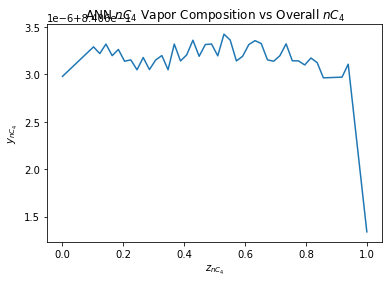

In [6]:
ANN_z = np.array(ANN_z)
ANN_vcomp = np.array(ANN_vcomp)

fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(ANN_z[:,0], ANN_vcomp[:,0])
ax.set_title(r'ANN $nC_4$ Vapor Composition vs Overall $nC_4$')
ax.set_xlabel(r'$z_{nC_4}$')
ax.set_ylabel(r'$y_{nC_4}$')

As expected, equilibrium phase compositions are constant in 2-phase region.  
Also, there were cases of negative flash reaching convergence. Make sure the returned composition makes sense.

## EOS

In [7]:
pr.useModel = False

In [8]:
EOS_lcomp = []
EOS_vcomp = []
EOS_z = []
for z[0] in np.linspace(0.001, 0.999, 50):
    z[1] = 1.-z[0]

    # Parameters independent of composition placed out of loop.
    # Used in either stability analysis or 2-phase PT flash.

    # Get all K-values from Wilson
    K = pr.wilson_corr(Pr, Tr, w)
    ln_K = np.log(K)

    # Get all ai, bi values
    a_i, b_i = pr.aibi(P, T, w, Pr, Tr, Pc, Tc)

    # Get Vw mixing, part with BIPs and square roots
    Am = pr.Vw(Nc,a_i,BIP)
    ##########################################################################################
    # Debug
    pr.tmp_list = []
    pr.z_list = []
    # Stability Analysis
    # Calculate constants ln_phi(z) ln(z[i])

    sumXX_list, liq_case, vap_case = pr.stability_analysis(T, P, z, b_i, Am, tolSSSA, itSSSAmax, Nc, K, TolXz)

    print('At P = %s bar, and T = %s K' % (P, T))
    if liq_case < 0 or vap_case < 0:
        print('Run 2-phase flash.')
        phase_num = 2
        liq_comp, vap_comp = pr.two_phase_flash_iterate(Pr, Tr, w, SSmaxit, SStol, TolRR, Nc, Am, b_i, NRmaxit, z) #todo: Update Stability_and_flash
        print('liq and vap comp:')
        print(liq_comp, vap_comp)
        
        # Store phase comps for plotting
        EOS_lcomp.append(list(liq_comp))
        EOS_vcomp.append(list(vap_comp))
        EOS_z.append(list(z))
    elif liq_case > 0 and vap_case > 0:
        print('Single phase stable')
        print('P = %s bar, T = %s K' % (P, T))
        print('Liq case: %d, Vap case: %d' % (liq_case, vap_case))
        # Copy single phase composition
        
print('END')


At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phase stable
P = 30 bar, T = 500 K
Liq case: 2, Vap case: 2
At P = 30 bar, and T = 500 K
Single phas

K new: [1.71358895 0.31545   ]
########################################
END 2-phase flash
liq and vap comp:
[0.48961513 0.51038487] [0.8389991 0.1610009]
At P = 30 bar, and T = 500 K
Run 2-phase flash.
[3.30259579 0.10711737]
SS Flash outer loop count: 0
Vapor frac: 0.611915168708467
Liquid comp: [0.27942064 0.72057936]
Vapor comp: [0.92281343 0.07718657]
K old: [3.30259579 0.10711737]
K new: [1.86980168 0.26848977]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.5443748725992811
Liquid comp: [0.45681933 0.54318067]
Vapor comp: [0.85416155 0.14583845]
K old: [1.86980168 0.26848977]
K new: [1.74565155 0.30451183]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.5294632695579263
Liquid comp: [0.48259593 0.51740407]
Vapor comp: [0.84244434 0.15755566]
K old: [1.74565155 0.30451183]
K new: [1.7208628  0.31286545]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.526154717469321
Liquid c

########################################
SS Flash outer loop count: 7
Vapor frac: 1.3413463706224495
Liquid comp: [0.48961065 0.51038935]
Vapor comp: [0.83900188 0.16099812]
K old: [1.71361035 0.31544177]
K new: [1.71359394 0.31544805]
########################################
SS Flash outer loop count: 8
Vapor frac: 1.3413578538711912
Liquid comp: [0.48961411 0.51038589]
Vapor comp: [0.83899977 0.16100023]
K old: [1.71359394 0.31544805]
K new: [1.7135901  0.31544954]
########################################
SS Flash outer loop count: 9
Vapor frac: 1.3413605914270252
Liquid comp: [0.48961491 0.51038509]
Vapor comp: [0.83899926 0.16100074]
K old: [1.7135901  0.31544954]
K new: [1.71358921 0.31544989]
########################################
SS Flash outer loop count: 10
Vapor frac: 1.3413612443219711
Liquid comp: [0.48961509 0.51038491]
Vapor comp: [0.83899913 0.16100087]
Exit flag:1
K old: [1.71358921 0.31544989]
K new: [1.713589   0.31544998]
########################################
SS

Text(0, 0.5, '$y_{nC_4}$')

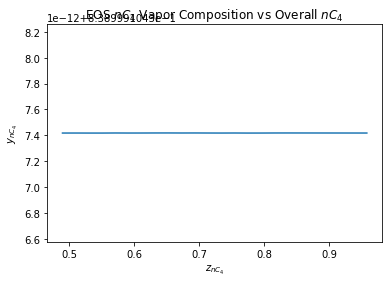

In [9]:
EOS_z = np.array(EOS_z)
EOS_vcomp = np.array(EOS_vcomp)

fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(EOS_z[:,0], EOS_vcomp[:,0])
ax.set_title(r'EOS $nC_4$ Vapor Composition vs Overall $nC_4$')
ax.set_xlabel(r'$z_{nC_4}$')
ax.set_ylabel(r'$y_{nC_4}$')

EOS vs ANN comparison plot

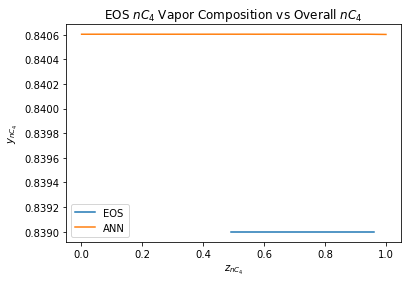

In [10]:
fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(EOS_z[:,0], EOS_vcomp[:,0], label='EOS')
ax.plot(ANN_z[:,0], ANN_vcomp[:,0], label='ANN')
ax.set_title(r'EOS $nC_4$ Vapor Composition vs Overall $nC_4$')
ax.set_xlabel(r'$z_{nC_4}$')
ax.set_ylabel(r'$y_{nC_4}$')
ax.legend()

In [11]:
ANN_vcomp - EOS_vcomp

ValueError: operands could not be broadcast together with shapes (42,2) (19,2) 